In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import torch
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import KFold
from rdkit import Chem
from rdkit.Chem import Draw
from scipy.stats import pearsonr

from dative_chemprop.models.DativeCGR import DativeCGR

torch.set_float32_matmul_precision("high")

chemprop_dir = Path.cwd()
random_seed = 42
n_folds = 5
data_splits = [
    (
        pd.read_csv(
            chemprop_dir / "data" / "OOS" / f"train_OOS_{i+1}.csv", index_col=0
        ),
        pd.read_csv(chemprop_dir / "data" / "OOS" / f"test_OOS_{i+1}.csv", index_col=0),
    )
    for i in range(17)
]

In [2]:
rxn_smiles_columns = [
    "rxn_smiles",
]  # use different reaction SMILES to do data augmentation

target_columns = [
    "ddG (kcal/mol)",
]  # list of names of the columns containing targets

batch_size = 128
result_dfs = []
for idx, (train_data, test_data) in enumerate(data_splits):
    train_smis = train_data[rxn_smiles_columns].values
    train_y = train_data[target_columns].values
    test_smis = test_data[rxn_smiles_columns].values
    test_y = test_data[target_columns].values
    model = DativeCGR(
        model_name=f"1-naive_{idx}",
        seed=random_seed,
    )
    if not os.path.exists(model.model_path):
        model.fit(
            train_smis.flatten(),
            train_y.repeat(len(rxn_smiles_columns), axis=0),
            batch_size=batch_size,
            num_workers=16,
            max_epochs=600,
            val_smis=test_smis.flatten(),
            val_y=test_y.repeat(len(rxn_smiles_columns), axis=0),
        )
    pred = model.predict(test_smis.flatten(), devices=[0])[:, 0]
    ddg_pred = pred.reshape(-1, len(rxn_smiles_columns)).mean(axis=1).flatten()
    ddg_true = test_y[:, 0].flatten()
    print("r2_score=", r2_score(ddg_true, ddg_pred))
    print("MAE=", mean_absolute_error(ddg_true, ddg_pred))
    print("Pearson R=", pearsonr(ddg_true, ddg_pred)[0])
    result_dfs.append(
        pd.DataFrame(
            {
                "method": ["naive"] * len(test_data.index),
                "idx": [idx] * len(test_data.index),
                "y_true": ddg_true,
                "y_pred": ddg_pred,
            }
        )
    )

Loaded model from .checkpoints/1-naive_0_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]
r2_score= 0.20498070102019084
MAE= 0.5269127781470336
Pearson R= 0.5517660245496365
Loaded model from .checkpoints/1-naive_1_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 163.76it/s]
r2_score= 0.2151851910093956
MAE= 0.5968971391823177
Pearson R= 0.6042129572692928
Loaded model from .checkpoints/1-naive_2_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 136.04it/s]
r2_score= 0.35508151385875153
MAE= 0.7772436786381896
Pearson R= 0.6109839538169022


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Loaded model from .checkpoints/1-naive_3_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 181.04it/s]
r2_score= 0.20362849361909807
MAE= 0.33421724991082763
Pearson R= 0.6012137394632254
Loaded model from .checkpoints/1-naive_4_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 164.49it/s]
r2_score= 0.150908035844882
MAE= 0.4290291343137946
Pearson R= 0.7171774121074846
Loaded model from .checkpoints/1-naive_5_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 102.22it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.2633573340959543
MAE= 0.2702301353083926
Pearson R= 0.6068521503930846
Loaded model from .checkpoints/1-naive_6_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 166.36it/s]
r2_score= -0.7911986560917961
MAE= 0.6912568951003722
Pearson R= 0.23710357262864118
Loaded model from .checkpoints/1-naive_7_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 165.78it/s]
r2_score= -1.561024753547171
MAE= 0.4241322371643957
Pearson R= 0.06823776909761373
Loaded model from .checkpoints/1-naive_8_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 159.18it/s]
r2_score= 0.5575051319823503
MAE= 0.43727874237633313
Pearson R= 0.8788162386855264
Loaded model from .checkpoints/1-naive_9_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 170.98it/s]
r2_score= -2.536133017421909
MAE= 0.8087474644092246
Pearson R= 0.46509228927761653
Loaded model from .checkpoints/1-naive_10_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 145.68it/s]
r2_score= 0.26685813974736217
MAE= 0.496635078803453
Pearson R= 0.5170593507078356


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Loaded model from .checkpoints/1-naive_11_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 141.73it/s]
r2_score= -0.07840285904612809
MAE= 0.8001592824903451
Pearson R= 0.20559342894483706
Loaded model from .checkpoints/1-naive_12_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 144.13it/s]
r2_score= -0.06669265178587858
MAE= 0.6951515768074054
Pearson R= 0.3214156500153076
Loaded model from .checkpoints/1-naive_13_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 153.34it/s]
r2_score= -0.012202745933465264
MAE= 0.3366961097268052
Pearson R= 0.3458494570828415
Loaded model from .checkpoints/1-naive_14_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 171.95it/s]
r2_score= -0.27451636555838066
MAE= 0.4388685229821066
Pearson R= 0.08732038799471084
Loaded model from .checkpoints/1-naive_15_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 111.23it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.8188715325017428
MAE= 0.6373376862712355
Pearson R= 0.145005945769075
Loaded model from .checkpoints/1-naive_16_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 132.03it/s]
r2_score= -2.107761483000376
MAE= 1.014229702632685
Pearson R= 0.30642434969945176


In [3]:
rxn_smiles_columns = [
    "rxn_smiles",
    "pesudo_active_donor_rxn_smiles",
    "no_extra_dative_rxn_smiles",
    "no_extra_dative_pesudo_active_donor_rxn_smiles",
]  # use different reaction SMILES to do data augmentation

target_columns = [
    "ddG (kcal/mol)",
]  # list of names of the columns containing targets

batch_size = 128
for idx, (train_data, test_data) in enumerate(data_splits):
    train_smis = train_data[rxn_smiles_columns].values
    train_y = train_data[target_columns].values
    test_smis = test_data[rxn_smiles_columns].values
    test_y = test_data[target_columns].values
    model = DativeCGR(
        model_name=f"2-pesudo_{idx}",
        seed=random_seed,
    )
    if not os.path.exists(model.model_path):
        model.fit(
            train_smis.flatten(),
            train_y.repeat(len(rxn_smiles_columns), axis=0),
            batch_size=batch_size,
            num_workers=16,
            max_epochs=600,
            val_smis=test_smis.flatten(),
            val_y=test_y.repeat(len(rxn_smiles_columns), axis=0),
        )
    pred = model.predict(test_smis.flatten(), devices=[0])[:, 0]
    ddg_pred = pred.reshape(-1, len(rxn_smiles_columns)).mean(axis=1).flatten()
    ddg_true = test_y[:, 0].flatten()
    print("r2_score=", r2_score(ddg_true, ddg_pred))
    print("MAE=", mean_absolute_error(ddg_true, ddg_pred))
    print("Pearson R=", pearsonr(ddg_true, ddg_pred)[0])
    result_dfs.append(
        pd.DataFrame(
            {
                "method": ["pseudo"] * len(test_data.index),
                "idx": [idx] * len(test_data.index),
                "y_true": ddg_true,
                "y_pred": ddg_pred,
            }
        )
    )

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Loaded model from .checkpoints/2-pesudo_0_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 139.44it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.08494053347366659
MAE= 0.4788870392487039
Pearson R= 0.4776771240545282
Loaded model from .checkpoints/2-pesudo_1_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 112.89it/s]


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

r2_score= 0.23100665519109542
MAE= 0.6218143268038482
Pearson R= 0.7013069722653327
Loaded model from .checkpoints/2-pesudo_2_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 107.88it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.3292946705469266
MAE= 0.7837221487686158
Pearson R= 0.7021802113214307
Loaded model from .checkpoints/2-pesudo_3_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 113.62it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.02738453645285599
MAE= 0.42339068497402954
Pearson R= 0.30965147986330976
Loaded model from .checkpoints/2-pesudo_4_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 154.59it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -1.3965882079041236
MAE= 0.799055982025606
Pearson R= 0.44552009493794353
Loaded model from .checkpoints/2-pesudo_5_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 160.45it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.013673042030765359
MAE= 0.31504566398914174
Pearson R= 0.5585460653713636
Loaded model from .checkpoints/2-pesudo_6_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 153.55it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.6346544913415617
MAE= 0.7498558324664815
Pearson R= 0.28133450514869884
Loaded model from .checkpoints/2-pesudo_7_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 173.90it/s]


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

r2_score= -1.3410987342206693
MAE= 0.44637315182268905
Pearson R= 0.3022608278864257
Loaded model from .checkpoints/2-pesudo_8_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 166.45it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.058347292110348725
MAE= 0.6433604128927162
Pearson R= 0.6625796300513119
Loaded model from .checkpoints/2-pesudo_9_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 124.38it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.8496191094669396
MAE= 0.5731856422843467
Pearson R= 0.4713662980424155
Loaded model from .checkpoints/2-pesudo_10_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 150.99it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.10230005388252739
MAE= 0.4660850600029963
Pearson R= 0.37836898446913275
Loaded model from .checkpoints/2-pesudo_11_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 130.50it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.24774716073463976
MAE= 0.8570348016382153
Pearson R= 0.15696648996127277
Loaded model from .checkpoints/2-pesudo_12_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 161.93it/s]


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

r2_score= 0.05102500903506613
MAE= 0.6728592571941071
Pearson R= 0.47709320267741206
Loaded model from .checkpoints/2-pesudo_13_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 171.90it/s]


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

r2_score= 0.0048686409299046884
MAE= 0.31311380200054933
Pearson R= 0.5619510896607304
Loaded model from .checkpoints/2-pesudo_14_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 161.42it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.5052693653290856
MAE= 0.5088709408239238
Pearson R= -0.07187627357940998
Loaded model from .checkpoints/2-pesudo_15_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 184.81it/s]


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

r2_score= -0.4477851311308896
MAE= 0.6153491378886908
Pearson R= 0.09333144084667654
Loaded model from .checkpoints/2-pesudo_16_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 159.19it/s]
r2_score= -1.0636947848755818
MAE= 0.8446585780290156
Pearson R= 0.40892211411275364


In [4]:
rxn_smiles_columns = [
    "rxn_smiles",
    "rxn_active_smiles",
    "dative_active_rxn_smiles",
    "dative_rxn_smiles",
]  # use different reaction SMILES to do data augmentation

target_columns = [
    "ddG (kcal/mol)",
]  # list of names of the columns containing targets

batch_size = 128
for idx, (train_data, test_data) in enumerate(data_splits):
    train_smis = train_data[rxn_smiles_columns].values
    train_y = train_data[target_columns].values
    test_smis = test_data[rxn_smiles_columns].values
    test_y = test_data[target_columns].values
    model = DativeCGR(
        model_name=f"3-hybrid_{idx}",
        seed=random_seed,
    )
    if not os.path.exists(model.model_path):
        model.fit(
            train_smis.flatten(),
            train_y.repeat(len(rxn_smiles_columns), axis=0),
            batch_size=batch_size,
            num_workers=16,
            max_epochs=600,
            val_smis=test_smis.flatten(),
            val_y=test_y.repeat(len(rxn_smiles_columns), axis=0),
        )
    pred = model.predict(test_smis.flatten(), devices=[0])[:, 0]
    ddg_pred = pred.reshape(-1, len(rxn_smiles_columns)).mean(axis=1).flatten()
    ddg_true = test_y[:, 0].flatten()
    print("r2_score=", r2_score(ddg_true, ddg_pred))
    print("MAE=", mean_absolute_error(ddg_true, ddg_pred))
    print("Pearson R=", pearsonr(ddg_true, ddg_pred)[0])
    result_dfs.append(
        pd.DataFrame(
            {
                "method": ["Augmented"] * len(test_data.index),
                "idx": [idx] * len(test_data.index),
                "y_true": ddg_true,
                "y_pred": ddg_pred,
            }
        )
    )

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Loaded model from .checkpoints/3-hybrid_0_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 140.28it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.26226425074464343
MAE= 0.44379468975285064
Pearson R= 0.5430901827812608
Loaded model from .checkpoints/3-hybrid_1_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 105.89it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.5083310196841426
MAE= 0.4853324060943012
Pearson R= 0.7803435660069634
Loaded model from .checkpoints/3-hybrid_2_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 129.35it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.21849299432172542
MAE= 0.8185018879117294
Pearson R= 0.6359654398834987
Loaded model from .checkpoints/3-hybrid_3_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 98.92it/s] 

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.3010591521733754
MAE= 0.35998192996151923
Pearson R= 0.5745695973155962
Loaded model from .checkpoints/3-hybrid_4_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 138.12it/s]
r2_score= -0.7689572213471925
MAE= 0.6785005938198725
Pearson R= 0.5237711527580661
Loaded model from .checkpoints/3-hybrid_5_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 151.72it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.2236573341233865
MAE= 0.27437112805287006
Pearson R= 0.5893648898347357
Loaded model from .checkpoints/3-hybrid_6_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 134.74it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.35698397017482075
MAE= 0.615363220067393
Pearson R= 0.37245580657926336
Loaded model from .checkpoints/3-hybrid_7_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 87.15it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -1.420535315657736
MAE= 0.42815263510024765
Pearson R= 0.5392013447689157
Loaded model from .checkpoints/3-hybrid_8_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 145.65it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.32236288691329895
MAE= 0.5486299188983249
Pearson R= 0.703879747889345
Loaded model from .checkpoints/3-hybrid_9_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 149.68it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.653026937824313
MAE= 0.533098648109235
Pearson R= 0.5831167152889088
Loaded model from .checkpoints/3-hybrid_10_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 114.33it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.07991667552933757
MAE= 0.4728600291354121
Pearson R= 0.5137863641104927
Loaded model from .checkpoints/3-hybrid_11_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 119.54it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.017043250037942714
MAE= 0.806483667787005
Pearson R= 0.2376467533867435
Loaded model from .checkpoints/3-hybrid_12_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 148.39it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.030213971084875113
MAE= 0.6195473611808524
Pearson R= 0.5931229839186413
Loaded model from .checkpoints/3-hybrid_13_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 145.15it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.08573160955115644
MAE= 0.3441035715657189
Pearson R= 0.4848338857337158
Loaded model from .checkpoints/3-hybrid_14_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 135.93it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.3392413587970011
MAE= 0.5059739893933338
Pearson R= -0.07533911101386115
Loaded model from .checkpoints/3-hybrid_15_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 175.56it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.7517589767413113
MAE= 0.6612254887640433
Pearson R= -0.05262705172121265
Loaded model from .checkpoints/3-hybrid_16_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 128.19it/s]
r2_score= -1.0869061468957146
MAE= 0.8229222286866588
Pearson R= 0.4316944424360531


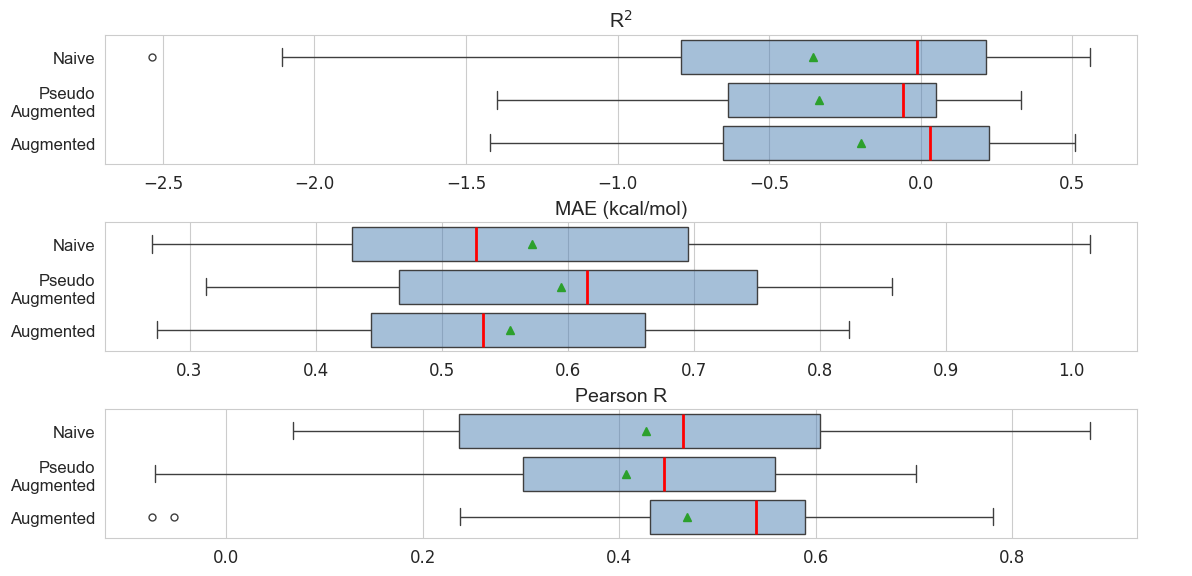

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_methods = {
    "naive": "Naive",
    "pseudo": "Pseudo\nAugmented",
    "Augmented": "Augmented",
}
results = []
for df in result_dfs:
    method = df["method"].iloc[0]
    if method not in selected_methods:
        continue
    for label, subdf in df.groupby("idx"):
        results.append(
            {
                "idx": subdf["idx"].iloc[0],
                "method": method,
                "metrics": "R$^2$",
                "value": r2_score(subdf["y_true"], subdf["y_pred"]),
            }
        )
        results.append(
            {
                "idx": subdf["idx"].iloc[0],
                "method": method,
                "metrics": "MAE",
                "value": mean_absolute_error(subdf["y_true"], subdf["y_pred"]),
            }
        )
        results.append(
            {
                "idx": subdf["idx"].iloc[0],
                "method": method,
                "metrics": "Pearson R",
                "value": pearsonr(subdf["y_true"], subdf["y_pred"])[0],
            }
        )
with sns.axes_style("whitegrid"):
    g = sns.catplot(
        pd.DataFrame(results),
        y="method",
        x="value",
        row="metrics",
        kind="box",
        sharex=False,
        boxprops={"facecolor": (0.3, 0.5, 0.7, 0.5)},
        medianprops={"color": "r", "linewidth": 2},
        facet_kws=dict(despine=False),
        showmeans=True,
    )
    g.figure.set_size_inches(12, 6)
    g.tight_layout()
    g.set_xlabels("")
    g.set_ylabels("")
    g.set_yticklabels(selected_methods.values(), fontfamily="Arial", fontsize=12)
    for idx, ((i, j, k), data_ijk) in enumerate(g.facet_data()):
        ax = g.facet_axis(i, j, k)
        if idx == 0:
            ax.set_title("R$^2$", fontsize=14, fontfamily="Arial")
        if idx == 1:
            ax.set_title("MAE (kcal/mol)", fontsize=14, fontfamily="Arial")
        if idx == 2:
            ax.set_title("Pearson R", fontsize=14, fontfamily="Arial")
    for idx, ((i, j, k), data_ijk) in enumerate(g.facet_data()):
        ax = g.facet_axis(i, j, k)
        for i, label in enumerate(ax.get_xticklabels()):
            label.set_fontsize(12)

In [6]:
from skfp.fingerprints import ECFPFingerprint
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS

fpgen = ECFPFingerprint(radius=3, fp_size=2048, count=True)
rxn_smiles_columns = [
    "rxn_smiles",
]  # use different reaction SMILES to do data augmentation

target_columns = [
    "ddG (kcal/mol)",
]  # list of names of the columns containing targets

batch_size = 128
for idx, (train_data, test_data) in enumerate(data_splits):
    train_smis = train_data[rxn_smiles_columns].values
    train_y = train_data[target_columns].values
    test_smis = test_data[rxn_smiles_columns].values
    test_y = test_data[target_columns].values
    retrain_model = DativeCGR(
        model_name=f"1-naive_{idx}_weighted_tuned",
        seed=random_seed,
    )
    if not os.path.exists(model.model_path):
        base_model = DativeCGR(
            model_name=f"1-naive_{idx}",
            seed=random_seed,
        )
        retrain_model.load_from_checkpoint(base_model.model_path)
        target_acceptor = test_data["acceptor_smiles"].unique()[0]
        target_donor = test_data["donor_smiles"].unique()[0]
        weights = np.exp(
            -PAIRWISE_DISTANCE_FUNCTIONS["cosine"](
                np.concatenate(
                    [
                        fpgen.transform(train_data["donor_smiles"]),
                        fpgen.transform(train_data["acceptor_smiles"]),
                    ],
                    axis=1,
                ),
                np.concatenate(
                    [
                        fpgen.transform([target_donor]),
                        fpgen.transform([target_acceptor]),
                    ],
                    axis=1,
                ),
            )
        )
        retrain_model.fit(
            train_smis.flatten(),
            (train_y * weights / weights.max()).repeat(len(rxn_smiles_columns), axis=0),
            batch_size=batch_size,
            num_workers=16,
            max_epochs=200,
            val_smis=test_smis.flatten(),
            val_y=test_y.repeat(len(rxn_smiles_columns), axis=0),
            devices=[0],
        )
    pred = retrain_model.predict(test_smis.flatten(), devices=[0])[:, 0]
    ddg_pred = pred.reshape(-1, len(rxn_smiles_columns)).mean(axis=1).flatten()
    ddg_true = test_y[:, 0].flatten()
    print("r2_score=", r2_score(ddg_true, ddg_pred))
    print("MAE=", mean_absolute_error(ddg_true, ddg_pred))
    print("Pearson R=", pearsonr(ddg_true, ddg_pred)[0])
    result_dfs.append(
        pd.DataFrame(
            {
                "method": ["naive with weighted tuned"] * len(test_data.index),
                "idx": [idx] * len(test_data.index),
                "y_true": ddg_true,
                "y_pred": ddg_pred,
            }
        )
    )

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization

Loaded model from .checkpoints/1-naive_0_weighted_tuned_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 174.84it/s]
r2_score= 0.4271934628998798
MAE= 0.44657682799682435
Pearson R= 0.6956836957665522
Loaded model from .checkpoints/1-naive_1_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 156.53it/s]
r2_score= 0.2948678525072148
MAE= 0.622659857353199
Pearson R= 0.7454235475932915
Loaded model from .checkpoints/1-naive_2_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 146.66it/s]
r2_score= 0.3272116194276913
MAE= 0.8106872496722747
Pearson R= 0.5977860876514705


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Loaded model from .checkpoints/1-naive_3_weighted_tuned_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 176.31it/s]
r2_score= 0.24106902710200184
MAE= 0.33269189694660567
Pearson R= 0.6636308630216977
Loaded model from .checkpoints/1-naive_4_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 171.86it/s]
r2_score= 0.17924594992267573
MAE= 0.4148703589087797
Pearson R= 0.7298183141848625
Loaded model from .checkpoints/1-naive_5_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 110.80it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.38292246476119063
MAE= 0.243502119367321
Pearson R= 0.6607135467404741
Loaded model from .checkpoints/1-naive_6_weighted_tuned_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 171.44it/s]
r2_score= -0.5810574153572958
MAE= 0.6649942707041541
Pearson R= 0.27885476229488415
Loaded model from .checkpoints/1-naive_7_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 170.56it/s]
r2_score= -0.9877269011730345
MAE= 0.3935957643670019
Pearson R= 0.22127445355712677
Loaded model from .checkpoints/1-naive_8_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 179.35it/s]
r2_score= 0.611751099240152
MAE= 0.4411683973982897
Pearson R= 0.9086831395138899
Loaded model from .checkpoints/1-naive_9_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 131.06it/s]
r2_score= -1.6886121566255938
MAE= 0.7105802097649428
Pearson R= 0.5608228655520513
Loaded model from .checkpoints/1-naive_10_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 168.25it/s]
r2_score= 0.44127166287129216
MAE= 0.45009886889505424
Pearson R= 0.7115842088762905


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Loaded model from .checkpoints/1-naive_11_weighted_tuned_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 149.14it/s]
r2_score= 0.14757481074593826
MAE= 0.7231335088657659
Pearson R= 0.38914230291149693


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Loaded model from .checkpoints/1-naive_12_weighted_tuned_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 160.18it/s]
r2_score= 0.0031396331285240553
MAE= 0.6712796182096389
Pearson R= 0.4607610609120665
Loaded model from .checkpoints/1-naive_13_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 164.43it/s]
r2_score= 0.32183720013329786
MAE= 0.27876475657343697
Pearson R= 0.5744975584041625


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Loaded model from .checkpoints/1-naive_14_weighted_tuned_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 149.79it/s]
r2_score= -0.4524164185463109
MAE= 0.43763986405618727
Pearson R= 0.04521705440615979
Loaded model from .checkpoints/1-naive_15_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 113.92it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.28691058229989963
MAE= 0.5623264114732212
Pearson R= 0.2586683182113957
Loaded model from .checkpoints/1-naive_16_weighted_tuned_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 174.50it/s]
r2_score= -1.2353244530856307
MAE= 0.8569308511656174
Pearson R= 0.5442715483998875


In [7]:
rxn_smiles_columns = [
    "rxn_smiles",
    "rxn_active_smiles",
    "dative_active_rxn_smiles",
    "dative_rxn_smiles",
]  # use different reaction SMILES to do data augmentation

target_columns = [
    "ddG (kcal/mol)",
]  # list of names of the columns containing targets

batch_size = 128
for idx, (train_data, test_data) in enumerate(data_splits):
    train_smis = train_data[rxn_smiles_columns].values
    train_y = train_data[target_columns].values
    test_smis = test_data[rxn_smiles_columns].values
    test_y = test_data[target_columns].values
    retrain_model = DativeCGR(
        model_name=f"3-hybrid_{idx}_weighted_tuned_negative",
        seed=random_seed,
    )
    if not os.path.exists(model.model_path):
        base_model = DativeCGR(
            model_name=f"3-hybrid_{idx}",
            seed=random_seed,
        )
        retrain_model.load_from_checkpoint(base_model.model_path)
        target_acceptor = test_data["acceptor_smiles"].unique()[0]
        target_donor = test_data["donor_smiles"].unique()[0]
        weights = np.exp(
            PAIRWISE_DISTANCE_FUNCTIONS["cosine"](
                np.concatenate(
                    [
                        fpgen.transform(train_data["donor_smiles"]),
                        fpgen.transform(train_data["acceptor_smiles"]),
                    ],
                    axis=1,
                ),
                np.concatenate(
                    [
                        fpgen.transform([target_donor]),
                        fpgen.transform([target_acceptor]),
                    ],
                    axis=1,
                ),
            )
        )
        retrain_model.fit(
            train_smis.flatten(),
            (train_y * weights / weights.max()).repeat(len(rxn_smiles_columns), axis=0),
            batch_size=batch_size,
            num_workers=16,
            max_epochs=200,
            val_smis=test_smis.flatten(),
            val_y=test_y.repeat(len(rxn_smiles_columns), axis=0),
            devices=[1],
        )
    pred = retrain_model.predict(test_smis.flatten(), devices=[0])[:, 0]
    ddg_pred = pred.reshape(-1, len(rxn_smiles_columns)).mean(axis=1).flatten()
    ddg_true = test_y[:, 0].flatten()
    print("r2_score=", r2_score(ddg_true, ddg_pred))
    print("MAE=", mean_absolute_error(ddg_true, ddg_pred))
    print("Pearson R=", pearsonr(ddg_true, ddg_pred)[0])
    result_dfs.append(
        pd.DataFrame(
            {
                "method": ["hybrid weighted_tuned_negative"] * len(test_data.index),
                "idx": [idx] * len(test_data.index),
                "y_true": ddg_true,
                "y_pred": ddg_pred,
            }
        )
    )

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Loaded model from .checkpoints/3-hybrid_0_weighted_tuned_negative_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 130.33it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -1.3932654956401507
MAE= 0.8603727305096004
Pearson R= 0.1871539061350015
Loaded model from .checkpoints/3-hybrid_1_weighted_tuned_negative_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 103.58it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.29366455611143905
MAE= 0.7637877541990614
Pearson R= 0.7986088533993363
Loaded model from .checkpoints/3-hybrid_2_weighted_tuned_negative_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 127.57it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.6341703569069426
MAE= 1.1597816836146821
Pearson R= 0.6469684492886313
Loaded model from .checkpoints/3-hybrid_3_weighted_tuned_negative_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 84.60it/s] 

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -1.7636169742735328
MAE= 0.8114720990659332
Pearson R= 0.4171386524133741
Loaded model from .checkpoints/3-hybrid_4_weighted_tuned_negative_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 127.85it/s]
r2_score= 0.07973910697135544
MAE= 0.5419629774372494
Pearson R= 0.3443938685522409
Loaded model from .checkpoints/3-hybrid_5_weighted_tuned_negative_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 152.36it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.706132082134123
MAE= 0.5389668280268373
Pearson R= 0.46184598718417813
Loaded model from .checkpoints/3-hybrid_6_weighted_tuned_negative_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 126.99it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.1819174512949644
MAE= 0.7237878486770672
Pearson R= 0.39233925897823485
Loaded model from .checkpoints/3-hybrid_7_weighted_tuned_negative_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 161.31it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.07440643960790683
MAE= 0.2690246116630001
Pearson R= 0.42335501180015145
Loaded model from .checkpoints/3-hybrid_8_weighted_tuned_negative_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 141.88it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.376773608991372
MAE= 0.951694214425977
Pearson R= 0.6326558312417627
Loaded model from .checkpoints/3-hybrid_9_weighted_tuned_negative_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 156.25it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.027319753285021675
MAE= 0.39766555930922204
Pearson R= 0.5439594063651103
Loaded model from .checkpoints/3-hybrid_10_weighted_tuned_negative_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 136.76it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.6953346289435942
MAE= 0.7956637932131744
Pearson R= -0.0006011447345992387
Loaded model from .checkpoints/3-hybrid_11_weighted_tuned_negative_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 131.57it/s]
r2_score= -0.44883720737184785
MAE= 0.7339892356155726
Pearson R= 0.006333245489006559


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Loaded model from .checkpoints/3-hybrid_12_weighted_tuned_negative_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 154.60it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.18971766991109673
MAE= 0.7104863911424011
Pearson R= 0.41612664232800023
Loaded model from .checkpoints/3-hybrid_13_weighted_tuned_negative_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 136.51it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.7449031634152392
MAE= 0.5021476253582712
Pearson R= 0.22196685033948832
Loaded model from .checkpoints/3-hybrid_14_weighted_tuned_negative_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 153.15it/s]
r2_score= -0.34059305360287895
MAE= 0.4983914029572892
Pearson R= -0.1430263251435277
Loaded model from .checkpoints/3-hybrid_15_weighted_tuned_negative_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 178.97it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.219159306843294
MAE= 0.5502931469772687
Pearson R= -0.2314434601404712
Loaded model from .checkpoints/3-hybrid_16_weighted_tuned_negative_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 151.18it/s]
r2_score= 0.06396070597198655
MAE= 0.5261780382446362
Pearson R= 0.29644842747415373


In [8]:
rxn_smiles_columns = [
    "rxn_smiles",
    "rxn_active_smiles",
    "dative_active_rxn_smiles",
    "dative_rxn_smiles",
]  # use different reaction SMILES to do data augmentation

target_columns = [
    "ddG (kcal/mol)",
]  # list of names of the columns containing targets

batch_size = 128
for idx, (train_data, test_data) in enumerate(data_splits):
    train_smis = train_data[rxn_smiles_columns].values
    train_y = train_data[target_columns].values
    test_smis = test_data[rxn_smiles_columns].values
    test_y = test_data[target_columns].values
    retrain_model = DativeCGR(
        model_name=f"3-hybrid_{idx}_weighted_tuned",
        seed=random_seed,
    )
    if not os.path.exists(retrain_model.model_path):
        base_model = DativeCGR(
            model_name=f"3-hybrid_{idx}",
            seed=random_seed,
        )
        retrain_model.load_from_checkpoint(base_model.model_path)
        target_acceptor = test_data["acceptor_smiles"].unique()[0]
        target_donor = test_data["donor_smiles"].unique()[0]
        weights = np.exp(
            -PAIRWISE_DISTANCE_FUNCTIONS["cosine"](
                np.concatenate(
                    [
                        fpgen.transform(train_data["donor_smiles"]),
                        fpgen.transform(train_data["acceptor_smiles"]),
                    ],
                    axis=1,
                ),
                np.concatenate(
                    [
                        fpgen.transform([target_donor]),
                        fpgen.transform([target_acceptor]),
                    ],
                    axis=1,
                ),
            )
        )
        retrain_model.fit(
            train_smis.flatten(),
            (train_y * weights / weights.max()).repeat(len(rxn_smiles_columns), axis=0),
            batch_size=batch_size,
            num_workers=16,
            max_epochs=200,
            val_smis=test_smis.flatten(),
            val_y=test_y.repeat(len(rxn_smiles_columns), axis=0),
            devices=[1],
        )
    pred = retrain_model.predict(test_smis.flatten(), devices=[0])[:, 0]
    ddg_pred = pred.reshape(-1, len(rxn_smiles_columns)).mean(axis=1).flatten()
    ddg_true = test_y[:, 0].flatten()
    print("r2_score=", r2_score(ddg_true, ddg_pred))
    print("MAE=", mean_absolute_error(ddg_true, ddg_pred))
    print("Pearson R=", pearsonr(ddg_true, ddg_pred)[0])
    result_dfs.append(
        pd.DataFrame(
            {
                "method": ["hybrid weighted tuned"] * len(test_data.index),
                "idx": [idx] * len(test_data.index),
                "y_true": ddg_true,
                "y_pred": ddg_pred,
            }
        )
    )

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Loaded model from .checkpoints/3-hybrid_0_weighted_tuned_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 135.86it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.47267784010909253
MAE= 0.3658781732819339
Pearson R= 0.6921139938079844
Loaded model from .checkpoints/3-hybrid_1_weighted_tuned_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 50.35it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.48937021700523586
MAE= 0.5036821392979507
Pearson R= 0.7672616505761402
Loaded model from .checkpoints/3-hybrid_2_weighted_tuned_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 115.80it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.2865492555620839
MAE= 0.817791435847434
Pearson R= 0.6315942364763261
Loaded model from .checkpoints/3-hybrid_3_weighted_tuned_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 92.26it/s] 

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.36795448899377325
MAE= 0.3308399562574196
Pearson R= 0.6693520097729881
Loaded model from .checkpoints/3-hybrid_4_weighted_tuned_reac_prod.pt.
Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 130.98it/s]
r2_score= -0.5588765947149048
MAE= 0.614346335920036
Pearson R= 0.5714137209582985
Loaded model from .checkpoints/3-hybrid_5_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 144.93it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.3886009694425482
MAE= 0.23643336394422884
Pearson R= 0.6723526368609993
Loaded model from .checkpoints/3-hybrid_6_weighted_tuned_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 136.76it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.34091707972982843
MAE= 0.6353969074205271
Pearson R= 0.3139394264287529
Loaded model from .checkpoints/3-hybrid_7_weighted_tuned_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 163.38it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.824270679633442
MAE= 0.35490116524160703
Pearson R= 0.5577224593884065
Loaded model from .checkpoints/3-hybrid_8_weighted_tuned_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 129.91it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.3824938889899756
MAE= 0.5877619632433375
Pearson R= 0.7235878288711963
Loaded model from .checkpoints/3-hybrid_9_weighted_tuned_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 135.95it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.6470489518686076
MAE= 0.5541644467604676
Pearson R= 0.697407822857617
Loaded model from .checkpoints/3-hybrid_10_weighted_tuned_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 122.32it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.35223935108864113
MAE= 0.43480594684969814
Pearson R= 0.7139305734657458
Loaded model from .checkpoints/3-hybrid_11_weighted_tuned_reac_prod.pt.


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 114.79it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.22157065352731398
MAE= 0.6983962730654042
Pearson R= 0.52467072352442
Loaded model from .checkpoints/3-hybrid_12_weighted_tuned_reac_prod.pt.


TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 128.91it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= -0.12971355996255363
MAE= 0.6519830587727339
Pearson R= 0.6098034333312633
Loaded model from .checkpoints/3-hybrid_13_weighted_tuned_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 162.84it/s]

/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h


r2_score= 0.32066788852305195
MAE= 0.3003825421703172
Pearson R= 0.5703207158620072
Loaded model from .checkpoints/3-hybrid_14_weighted_tuned_reac_prod.pt.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 127.28it/s]
r2_score= -0.26031018370934533
MAE= 0.45618162728237843
Pearson R= 0.011755343690714747
Loaded model from .checkpoints/3-hybrid_15_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 4/4 [00:00<00:00, 146.03it/s]
r2_score= -0.1895818213681093
MAE= 0.564327711728121
Pearson R= 0.1481673313334532
Loaded model from .checkpoints/3-hybrid_16_weighted_tuned_reac_prod.pt.


/home/tmj/miniforge3/envs/feng/lib/python3.11/site-packages/chemprop/models/model.py:242: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  d = torch.load(path, map_location)
/h

Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 122.24it/s]
r2_score= -1.0403681371844207
MAE= 0.7971747014397689
Pearson R= 0.4537589472018047


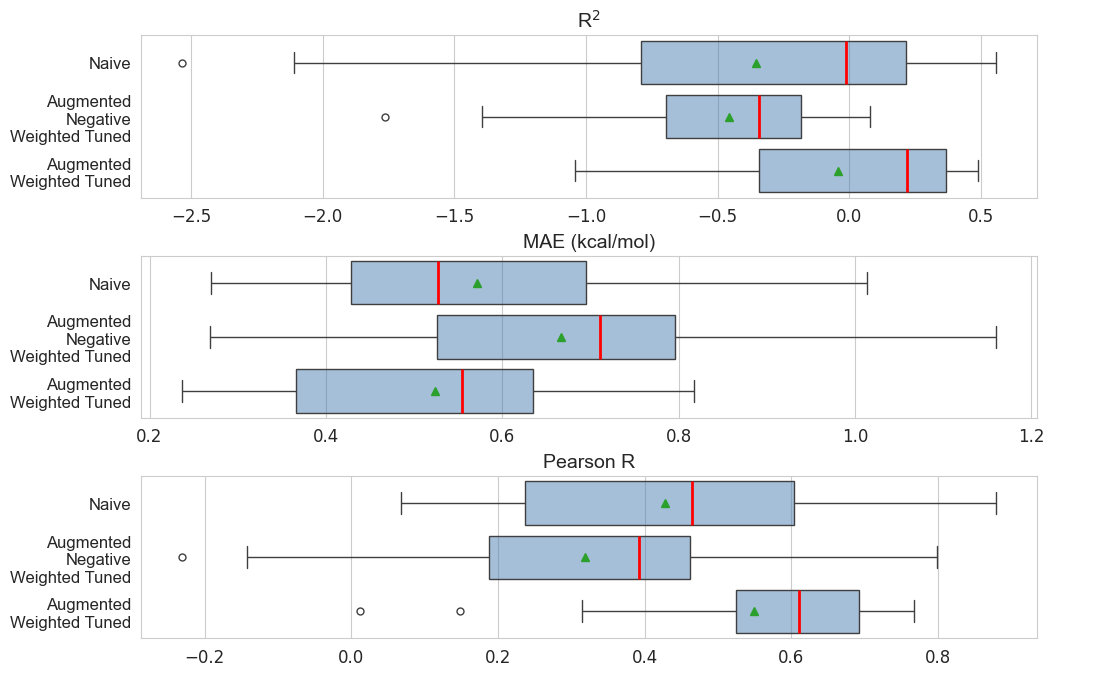

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_methods = {
    "naive": "Naive",
    "hybrid weighted_tuned_negative": "Augmented\nNegative\nWeighted Tuned",
    "hybrid weighted tuned": "Augmented\nWeighted Tuned",
}
results = []
for df in result_dfs:
    method = df["method"].iloc[0]
    if method not in selected_methods:
        continue
    for label, subdf in df.groupby("idx"):
        results.append(
            {
                "idx": subdf["idx"].iloc[0],
                "method": method,
                "metrics": "R$^2$",
                "value": r2_score(subdf["y_true"], subdf["y_pred"]),
            }
        )
        results.append(
            {
                "idx": subdf["idx"].iloc[0],
                "method": method,
                "metrics": "MAE",
                "value": mean_absolute_error(subdf["y_true"], subdf["y_pred"]),
            }
        )
        results.append(
            {
                "idx": subdf["idx"].iloc[0],
                "method": method,
                "metrics": "Pearson R",
                "value": pearsonr(subdf["y_true"], subdf["y_pred"])[0],
            }
        )
with sns.axes_style("whitegrid"):
    g = sns.catplot(
        pd.DataFrame(results),
        y="method",
        x="value",
        row="metrics",
        kind="box",
        sharex=False,
        boxprops={"facecolor": (0.3, 0.5, 0.7, 0.5)},
        medianprops={"color": "r", "linewidth": 2},
        facet_kws=dict(despine=False),
        showmeans=True,
    )
    g.figure.set_size_inches(12, 7)
    g.tight_layout()
    g.set_xlabels("")
    g.set_ylabels("")
    g.set_yticklabels(selected_methods.values(), fontfamily="Arial", fontsize=12)
    for idx, ((i, j, k), data_ijk) in enumerate(g.facet_data()):
        ax = g.facet_axis(i, j, k)
        if idx == 0:
            ax.set_title("R$^2$", fontsize=14, fontfamily="Arial")
        if idx == 1:
            ax.set_title("MAE (kcal/mol)", fontsize=14, fontfamily="Arial")
        if idx == 2:
            ax.set_title("Pearson R", fontsize=14, fontfamily="Arial")
    for idx, ((i, j, k), data_ijk) in enumerate(g.facet_data()):
        ax = g.facet_axis(i, j, k)
        for i, label in enumerate(ax.get_xticklabels()):
            label.set_fontsize(12)

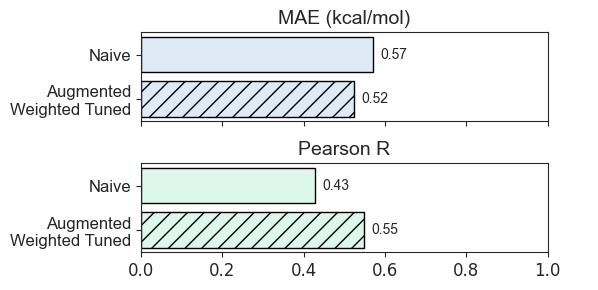

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_methods = {
    "naive": "Naive",
    "hybrid weighted tuned": "Augmented\nWeighted Tuned",
}
results = []
for df in result_dfs:
    method = df["method"].iloc[0]
    if method not in selected_methods:
        continue
    for label, subdf in df.groupby("idx"):
        results.append(
            {
                "idx": subdf["idx"].iloc[0],
                "method": method,
                "metrics": "MAE",
                "value": mean_absolute_error(subdf["y_true"], subdf["y_pred"]),
            }
        )
        results.append(
            {
                "idx": subdf["idx"].iloc[0],
                "method": method,
                "metrics": "Pearson R",
                "value": pearsonr(subdf["y_true"], subdf["y_pred"])[0],
            }
        )
with sns.axes_style("ticks"):
    g = sns.catplot(
        pd.DataFrame(results),
        y="method",
        x="value",
        row="metrics",
        kind="bar",
        sharex=True,
        errorbar=None,
        facet_kws=dict(despine=False, xlim=(0, 1)),
    )
    g.set_xlabels("")
    g.set_ylabels("")
    g.set_yticklabels(selected_methods.values(), fontfamily="Arial", fontsize=12)
    g.figure.set_size_inches(6, 3)
    for idx, ((i, j, k), data_ijk) in enumerate(g.facet_data()):
        ax = g.facet_axis(i, j, k)
        if idx == 0:
            for bar in ax.containers[0]:
                bar.set_edgecolor("black")
                bar.set_facecolor(color="#DEEBF7")
            else:
                bar.set_hatch("//")
            ax.set_title("MAE (kcal/mol)", fontsize=14, fontfamily="Arial")
        if idx == 1:
            for bar in ax.containers[0]:
                bar.set_edgecolor("black")
                bar.set_facecolor(color="#DEF7EC")
            else:
                bar.set_hatch("//")
            ax.set_title("Pearson R", fontsize=14, fontfamily="Arial")
    for idx, ((i, j, k), data_ijk) in enumerate(g.facet_data()):
        ax = g.facet_axis(i, j, k)
        for i, label in enumerate(ax.get_xticklabels()):
            label.set_fontsize(12)
        ax.bar_label(
            container=ax.containers[0],
            fmt="%.2f",
            padding=5,
            fontfamily="Arial",
            fontsize=10,
        )
g.tight_layout()
g.figure.savefig("img/Training_Strategies_Comparison.png", dpi=300)

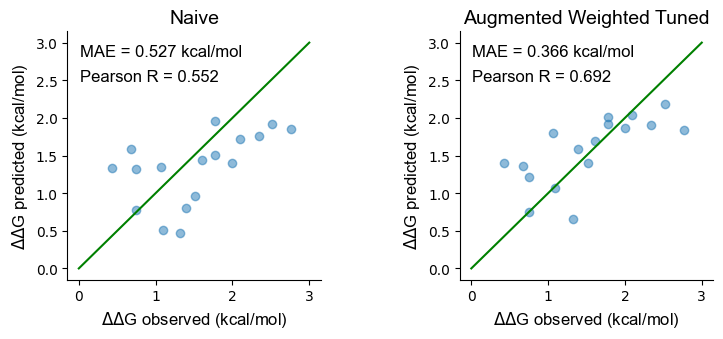

In [11]:
selected_methods = {
    "naive": "Naive",
    "hybrid weighted tuned": "Augmented Weighted Tuned",
}
idx = 0
g = sns.FacetGrid(
    pd.concat(
        [
            df
            for df in result_dfs
            if (df["idx"].iloc[0] == idx) and (df["method"].iloc[0] in selected_methods)
        ]
    ),
    col="method",
    sharey=False,
)
for (i, j, k), data_ijk in g.facet_data():
    ax = g.facet_axis(i, j, k)
    ax.plot([0, 3], [0, 3], color="green", linestyle="-")
    ax.scatter(
        x=data_ijk["y_true"],
        y=data_ijk["y_pred"],
        alpha=0.5,
    )
    ax.text(
        0.05,
        0.95,
        f"MAE = {mean_absolute_error(data_ijk['y_true'], data_ijk['y_pred']):5.3f} kcal/mol",
        transform=ax.transAxes,
        fontsize=12,
        fontfamily="Arial",
        verticalalignment="top",
    )
    ax.text(
        0.05,
        0.85,
        f"Pearson R = {pearsonr(data_ijk['y_true'], data_ijk['y_pred'])[0]:5.3f}",
        transform=ax.transAxes,
        fontsize=12,
        fontfamily="Arial",
        verticalalignment="top",
    )
    ax.set_title(
        selected_methods[data_ijk["method"].iloc[0]], fontfamily="Arial", fontsize=14
    )
    ax.set_xlabel(
        "$\Delta\Delta$G observed (kcal/mol)", fontfamily="Arial", fontsize=12
    )
    ax.set_ylabel(
        "$\Delta\Delta$G predicted (kcal/mol)", fontfamily="Arial", fontsize=12
    )
g.figure.subplots_adjust(wspace=5, hspace=0.02)
g.figure.set_size_inches(8, 3.5)
g.tight_layout()
g.figure.savefig("img/LORO_regression_plot.png", dpi=300)